In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
from math import sqrt 
from scipy.stats import t # Распределение Стьюдента
from scipy.stats import norm # Нормальное распределение

### Распределение Cтьюдента

In [2]:
df = 6 # число степеней свободы
r = t.rvs(df, size=1000) # Генерируем выборку 

Математическое ожидание распределения Стьюдента = 0, а дисперсия расчитывается по формуле $n/(n-2)$, где n - число степеней свободы.

In [4]:
m = 0 # математическое ожидание
D = 1.5 # дисперсия 

### Гистограмма выборки и теоретическая плотность распределения 

Text(0.5,0,u'$x$')

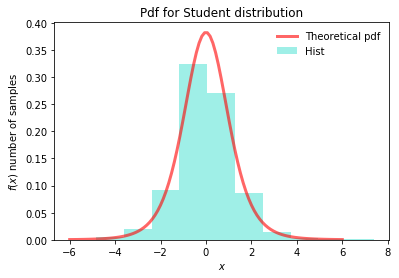

In [9]:
x = np.linspace(-6,6, 100)

# теоретическая плотность распределения
plt.plot(x, t.pdf(x, df),'r-', lw=3, alpha=0.6, label='Theoretical pdf')

# гистограмма
plt.hist(r, normed = True, histtype='stepfilled', alpha=0.5, label='Hist', color='turquoise')
plt.legend(loc='best', frameon = False)
plt.title('Pdf for Student distribution')
plt.ylabel('$f(x)$ number of samples')
plt.xlabel('$x$')

Для того, чтобы оценить распределение выборочного среднего случайной величины при разных объёмах выборок определим следующую функцию: 

In [10]:
def graphic(n):
    
    sample = [] # массив для выборочных средних 
    
    for i in range(1000):
        sample.append(np.mean(t.rvs(df, size=n)))# добовляем i-ое выборочное среднее в массив
    
    # определяем нормальное распределение с м.о. = м.о. исходного распределения
    # и дисперсией в n раз меньше 
    norm = sts.norm(m, sqrt(D/n))
    
    pdf =norm.pdf(x) # плотность нормального распределения
    # построение графиков 
    plt.plot(x, pdf, color ='red', label = 'Theoretical Pdf')
    
    # гистограмма для значений выборочных средний из sample
    plt.hist(sample, normed = True, histtype='stepfilled', alpha=0.6,color='turquoise', label='Hist')
    plt.legend(loc='best', frameon=False)
    
    plt.title('Pdf for Student distribution')
    plt.ylabel('number of samples')
    plt.xlabel('$x$')

Построим графики для выборок объема 5, 10, 50:

### Выборка объема 5

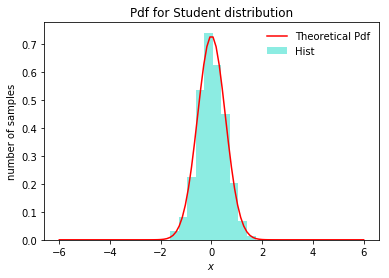

In [11]:
graphic(5)

### Выборка объема 10

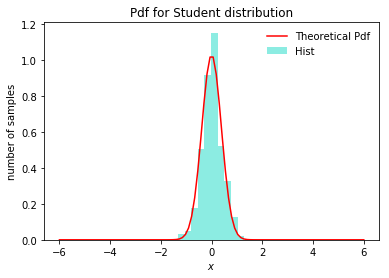

In [12]:
graphic(10)

### Выборка объема 50

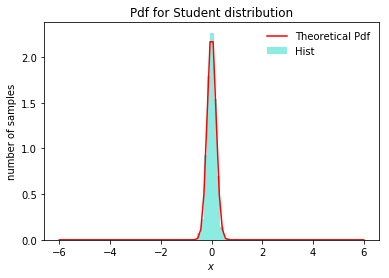

In [13]:
graphic(50)

### Вывод:

С ростом n - объема выборок точность аппроксимации нормальным распределением возрастает. Чем больше n, тем распределние уже за счет того, что дисперсия в корень из n раз меньше дисперсии исходного распределения. Исходя из полученных результатов, видим, что центральная предельная теорема работает!